Home Loan Classification using Decision Tree C4.5 with Forward Selection Feature

In [92]:
import numpy as np #linear algebra
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import warnings
import pickle
warnings.filterwarnings('ignore')

#Understanding the Data

In [93]:
#Showing 4 first row on train data frame
train_dataset = r'C:\Users\Aksa\Documents\Punya Aksa\Skripsweet\Python\Home Loan Classification\dataset\Train_Home_Loan.csv'
df=pd.read_csv(train_dataset)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [94]:
#Showing 4 first row on test data frame
test_dataset = r'C:\Users\Aksa\Documents\Punya Aksa\Skripsweet\Python\Home Loan Classification\dataset\Test_Home_Loan.csv'
df_test=pd.read_csv(test_dataset)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [95]:
#Information about train dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [96]:
#Detecting null value on data train
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [97]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

#Independent Variable (Numerical)

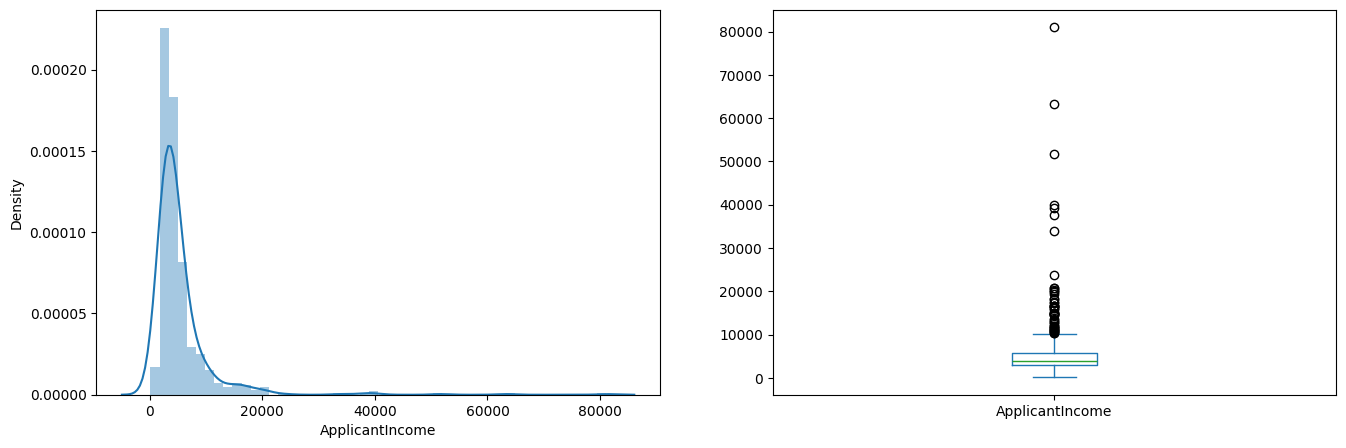

In [98]:
#Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)
#"ApplicantIncome" distribution
plt.figure(1)
plt.subplot(121)
sns.distplot(df["ApplicantIncome"]);

plt.subplot(122)
df["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

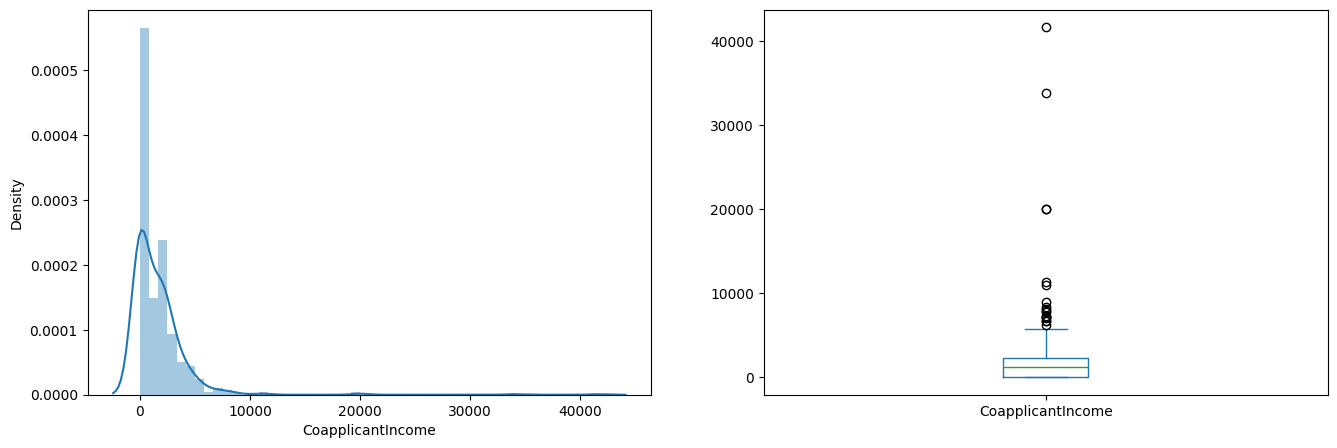

In [99]:
#"CoApplicantIncome" distribution
plt.figure(1)
plt.subplot(121)
sns.distplot(df["CoapplicantIncome"]);

plt.subplot(122)
df["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

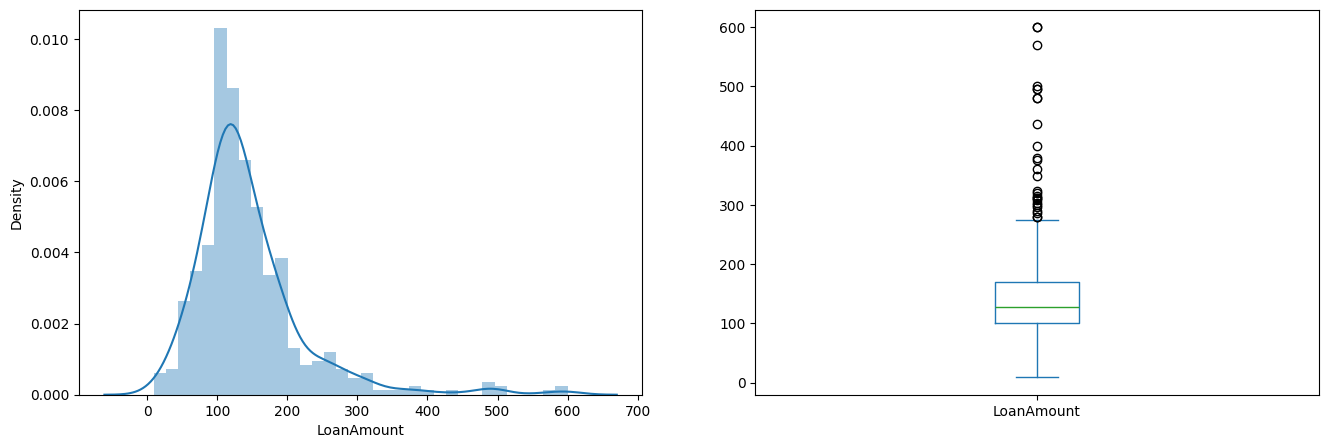

In [100]:
#"LoanAmount" distribution
plt.figure(1)
plt.subplot(121)
df=df.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

#Replacing feature value to make numerical variable

In [101]:
df['Dependents'].replace('3+',3,inplace=True)
df_test['Dependents'].replace('3+',3,inplace=True)
df['Loan_Status'].replace('N', 0,inplace=True)
df['Loan_Status'].replace('Y', 1,inplace=True)

# Imputation process on Data Train

In [102]:
#There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features
#We can consider these methods to fill the missing values: For numerical variables: imputation using mean or median
#For categorical variables: imputation using mode
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df['Dependents'].fillna(df["Dependents"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)

In [103]:
#Checking null value after imputation process
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [104]:
#The most frequent value
df["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
360.0    411
180.0     36
480.0     12
300.0      9
120.0      3
84.0       3
60.0       2
240.0      2
36.0       2
Name: count, dtype: int64

In [105]:
#Replacing missing value using the mode of this variable (assume that amount term is categorical data)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)

In [106]:
#Checking null value after imputation process
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [107]:
#Replacing missing value using median of this variable (numerical data)
df["LoanAmount"].fillna(df["LoanAmount"].median(),inplace=True)

In [108]:
#Checking null value after imputation process
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#Imputation process on Data Test

In [109]:
#Detecting null value on data test
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [110]:
df_test["Gender"].fillna(df_test["Gender"].mode()[0],inplace=True)
df_test['Dependents'].fillna(df_test["Dependents"].mode()[0],inplace=True)
df_test["Self_Employed"].fillna(df_test["Self_Employed"].mode()[0],inplace=True)
df_test["Loan_Amount_Term"].fillna(df_test["Loan_Amount_Term"].mode()[0],inplace=True)
df_test["Credit_History"].fillna(df_test["Credit_History"].mode()[0],inplace=True)
df_test["LoanAmount"].fillna(df_test["LoanAmount"].median(),inplace=True)

#Normalizing the Data Train

<Axes: xlabel='LoanAmount', ylabel='Density'>

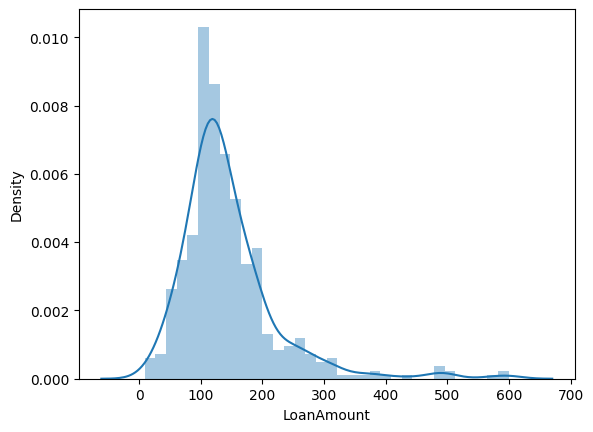

In [111]:
sns.distplot(df["LoanAmount"])

<Axes: >

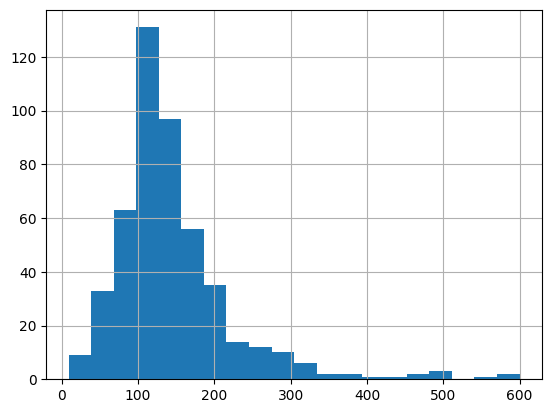

In [112]:
df['LoanAmount'].hist(bins=20)

In [113]:
# Memilih hanya kolom-kolom dengan tipe data numerik
numeric_columns = df.select_dtypes(include=['number'])

# Menghitung skewness pada kolom-kolom numerik
skewness = numeric_columns.skew(axis=0)

# Menampilkan hasil skewness
print(skewness)

ApplicantIncome      6.917027
CoapplicantIncome    5.881622
LoanAmount           2.361437
Loan_Amount_Term    -2.333710
Credit_History      -2.013253
Loan_Status         -0.832681
dtype: float64


In [114]:
# Memilih hanya kolom-kolom dengan tipe data numerik
numeric_columns = df.select_dtypes(include=['number'])

# Menghitung kurtosis pada kolom-kolom numerik
kurt = numeric_columns.kurtosis()

# Menampilkan hasil kurtosis
print(kurt)

ApplicantIncome      74.063152
CoapplicantIncome    57.658049
LoanAmount            8.502723
Loan_Amount_Term      6.362722
Credit_History        2.061763
Loan_Status          -1.312128
dtype: float64


<Axes: >

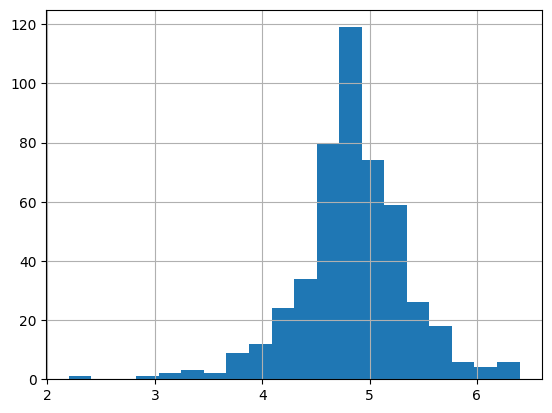

In [115]:
#Normalize Data the data using Logarithm
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

<Axes: >

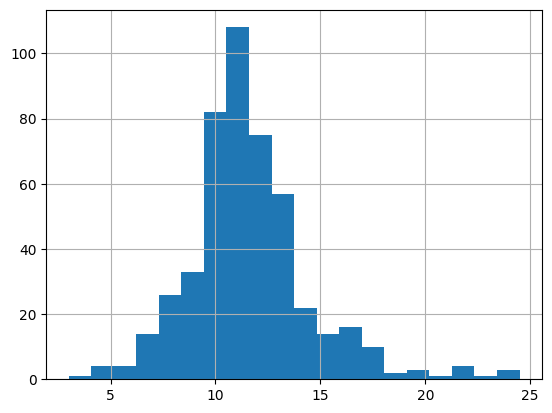

In [116]:
#Normalize Data the data using Square Root
df['LoanAmount_sqrt'] = np.sqrt(df['LoanAmount'])
df['LoanAmount_sqrt'].hist(bins=20)

<Axes: >

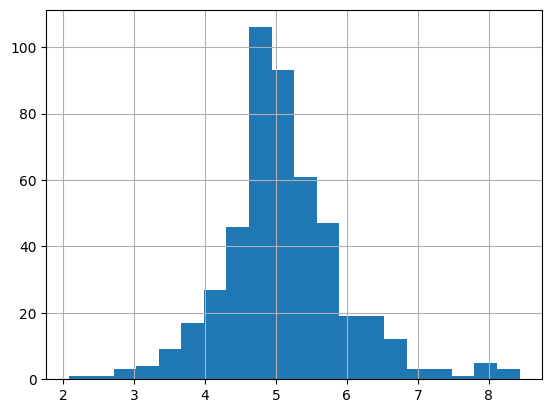

In [117]:
#Normalize Data the data using Cube Root
df['LoanAmount_cbrt'] = np.cbrt(df['LoanAmount'])
df['LoanAmount_cbrt'].hist(bins=20)

In [118]:
#Skewneess and Kurtosis after normalization using log, sqrt, and cbrt which log is best option
#sk=df.skew(axis=0)
#kurt=df.kurtosis(axis=0)
#print(sk)
#print(kurt)

<Axes: xlabel='LoanAmount_log', ylabel='Density'>

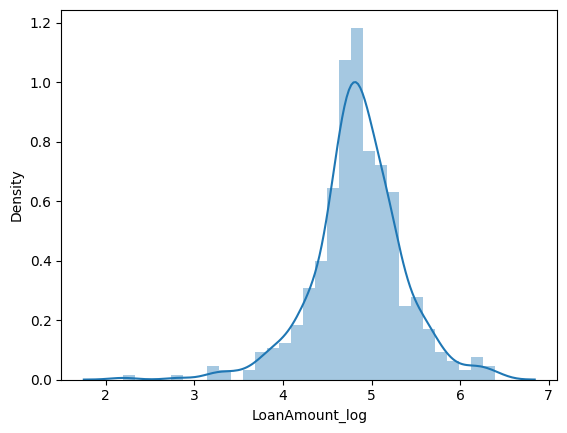

In [119]:
#Histogram after normalization using log, sqrt, and cbrt which log is best option
sns.distplot(df["LoanAmount_log"])

<Axes: >

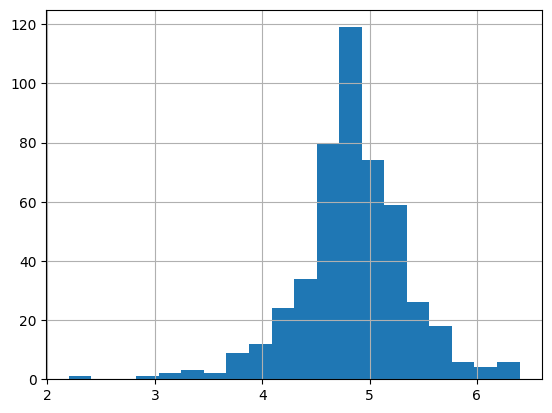

In [120]:
df['LoanAmount_log'].hist(bins=20)

#Normalizing the Data Test

<Axes: xlabel='LoanAmount', ylabel='Density'>

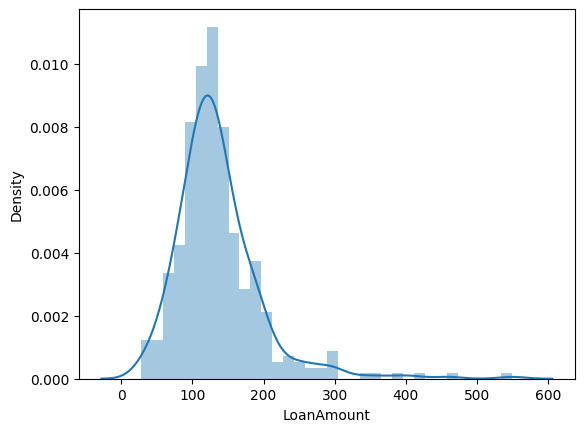

In [121]:
sns.distplot(df_test["LoanAmount"])

<Axes: >

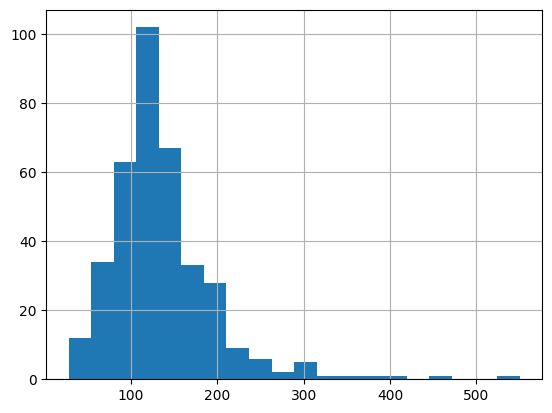

In [122]:
df_test['LoanAmount'].hist(bins=20)

In [123]:
#df_test.skew(axis=0)

In [124]:
#df_test.kurtosis(axis=0)

<Axes: >

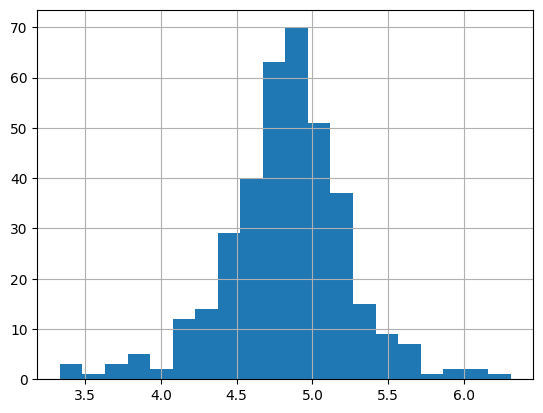

In [125]:
#Normalize the data using Logarithm (which best option to normalize data on Data Train)
df_test['LoanAmount_log'] = np.log(df_test['LoanAmount'])
df_test['LoanAmount_log'].hist(bins=20)

In [126]:
#Skewneess and Kurtosis after normalization using log on data test
# sk=df_test.skew(axis=0)
# kurt=df_test.kurtosis(axis=0)
# print(sk)
# print(kurt)

<Axes: >

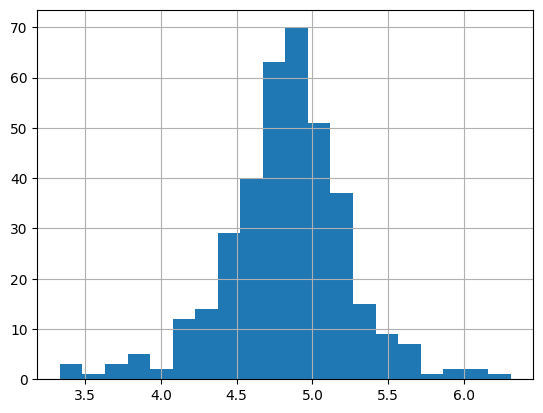

In [127]:
df_test['LoanAmount_log'].hist(bins=20)

#Feature Engineering

Create new feature on data train named as `TotalIncome`



In [128]:
#https://www.kaggle.com/code/sazid28/home-loan-prediction#Feature-Engineering
#Creating new features (TotalIncome) on train data frame
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']

In [129]:
#TotalIncome on train data frame
df[['TotalIncome']].head()

,TotalIncome
1,6091.0
2,3000.0
3,4941.0
4,6000.0
5,9613.0


<Axes: xlabel='TotalIncome', ylabel='Density'>

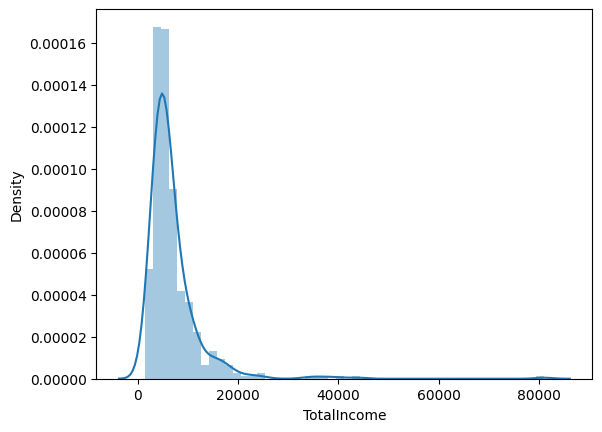

In [130]:
#Checking distribution data on train data frame TotalIncome in Histogram
sns.distplot(df['TotalIncome'])

In [131]:
#Checking skewness and kurtosis
sk=df['TotalIncome'].skew(axis=0)
kurt=df['TotalIncome'].kurtosis(axis=0)
print("Skewness Result:", sk)
print("Kurtosis Result:", kurt)

Skewness Result: 5.93135682683205
Kurtosis Result: 56.59003785775787


<Axes: xlabel='TotalIncome_log', ylabel='Density'>

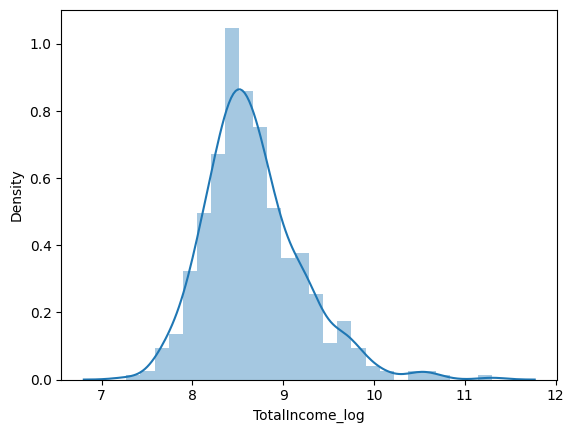

In [132]:
#Data normalization using logarithm to make distribution normal on data train
df["TotalIncome_log"] = np.log(df["TotalIncome"])
sns.distplot(df["TotalIncome_log"])

Create new feature on Data Test named as `TotalIncome`

In [133]:
#Now creating new featurs on test data frame
df_test["TotalIncome"]=df_test['ApplicantIncome']+df_test['CoapplicantIncome']

In [134]:
#TotalIncome on test data frame
df_test[['TotalIncome']].head()

,TotalIncome
0,5720
1,4576
2,6800
3,4886
4,3276


<Axes: xlabel='TotalIncome', ylabel='Density'>

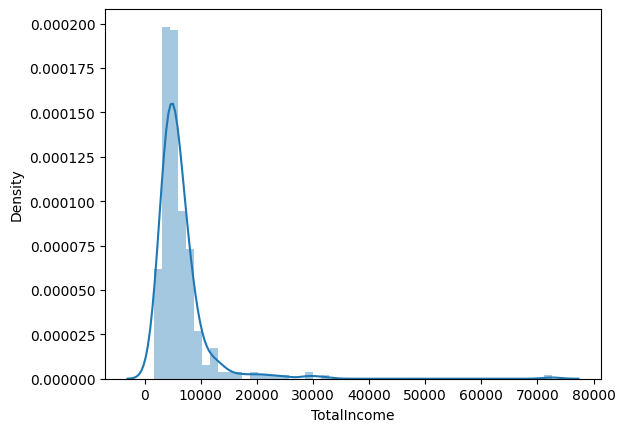

In [135]:
sns.distplot(df_test['TotalIncome'])

In [136]:
#Checking skewness and kurtosis
sk=df_test['TotalIncome'].skew(axis=0)
kurt=df_test['TotalIncome'].kurtosis(axis=0)
print("Skewness Result:", sk)
print("Kurtosis Result:", kurt)

Skewness Result: 6.994904417610182
Kurtosis Result: 75.18508455979881


<Axes: xlabel='TotalIncome_log', ylabel='Density'>

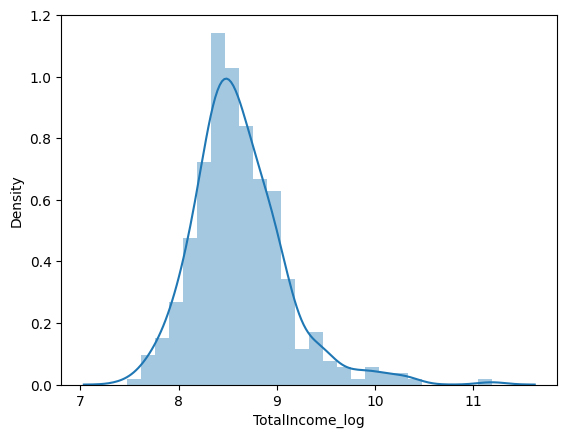

In [137]:
#Data normalization using logarithm to make distribution normal on data test
df_test["TotalIncome_log"] = np.log(df_test["TotalIncome"])
sns.distplot(df_test["TotalIncome_log"])
#plt.title("Distribusi TotalIncome_log")
#plt.show()

Create new feature on data train and data set named as `EMI` (Known as Angsuran Bulanan)

In [138]:
#Create Equated Monthly Instalment (EMI) - Angsuran bulanan
#https://www.kaggle.com/code/sazid28/home-loan-prediction#Feature-Engineering
df["EMI"]=df["LoanAmount"]/df["Loan_Amount_Term"]
df_test["EMI"]=df_test["LoanAmount"]/df_test["Loan_Amount_Term"]

In [139]:
df[["EMI"]].head()

,EMI
1,0.355556
2,0.183333
3,0.333333
4,0.391667
5,0.741667


In [140]:
df_test[["EMI"]].head()

,EMI
0,0.305556
1,0.350000
2,0.577778
3,0.277778
4,0.216667


<Axes: xlabel='EMI', ylabel='Density'>

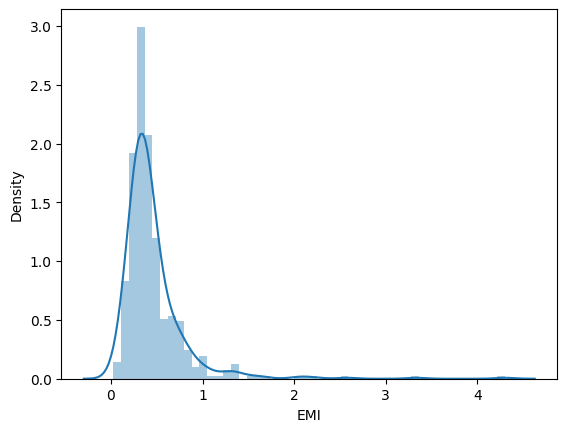

In [141]:
sns.distplot(df["EMI"])

<Axes: xlabel='EMI', ylabel='Density'>

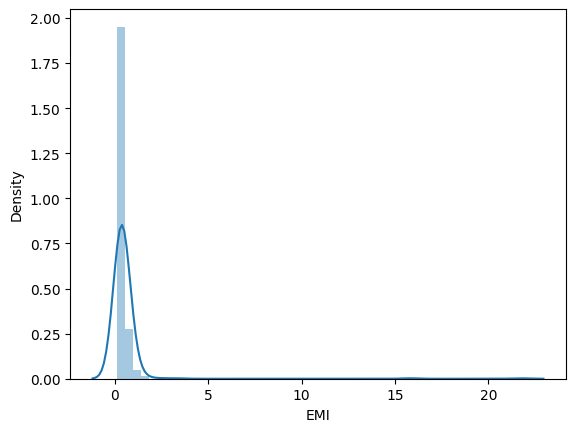

In [142]:
sns.distplot(df_test["EMI"])

Create new feature on data train and data set named as `BalanceIncome` (Known as Pendapatan Bersih)

In [143]:
df["Balance_Income"] = df["TotalIncome"]-df["EMI"]*1000 #To make the feature equal, we multiply with 1000
df_test["Balance_Income"] = df_test["TotalIncome"]-df_test["EMI"]

In [144]:
df[["Balance_Income"]].head()

,Balance_Income
1,5735.444444
2,2816.666667
3,4607.666667
4,5608.333333
5,8871.333333


In [145]:
df_test[["Balance_Income"]].head()

,Balance_Income
0,5719.694444
1,4575.650000
2,6799.422222
3,4885.722222
4,3275.783333


# Drop variables that not used

In [146]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,LoanAmount_sqrt,LoanAmount_cbrt,TotalIncome,TotalIncome_log,EMI,Balance_Income
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030,11.313708,5.039684,6091.0,8.714568,0.355556,5735.444444
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655,8.124038,4.041240,3000.0,8.006368,0.183333,2816.666667
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492,10.954451,4.932424,4941.0,8.505323,0.333333,4607.666667
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760,11.874342,5.204828,6000.0,8.699515,0.391667,5608.333333
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1,5.587249,16.340135,6.439277,9613.0,9.170872,0.741667,8871.333333


In [147]:
df=df.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term", "LoanAmount_sqrt", "LoanAmount_cbrt"],axis=1)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,0,4.852030,6091.0,8.714568,0.355556,5735.444444
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,1,4.189655,3000.0,8.006368,0.183333,2816.666667
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,1,4.787492,4941.0,8.505323,0.333333,4607.666667
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,1,4.948760,6000.0,8.699515,0.391667,5608.333333
5,LP001011,Male,Yes,2,Graduate,Yes,1.0,Urban,1,5.587249,9613.0,9.170872,0.741667,8871.333333


# Building Model using Decision Tree C4.5 Algorithm

Drop `Loan_ID` variable on data train and data test because this variable do not have any effect for `Loan_Status`

In [148]:
df=df.drop("Loan_ID",axis=1)
df_test=df_test.drop("Loan_ID",axis=1)

In [149]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
1,Male,Yes,1,Graduate,No,1.0,Rural,0,4.852030,6091.0,8.714568,0.355556,5735.444444
2,Male,Yes,0,Graduate,Yes,1.0,Urban,1,4.189655,3000.0,8.006368,0.183333,2816.666667


In [150]:
df_test.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720,8.651724,0.305556,5719.694444
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576,8.428581,0.350000,4575.650000


In [151]:
#X is a variable for df(training dataframe)
X=df.drop("Loan_Status", axis=1)

In [152]:
X.head(2)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
1,Male,Yes,1,Graduate,No,1.0,Rural,4.852030,6091.0,8.714568,0.355556,5735.444444
2,Male,Yes,0,Graduate,Yes,1.0,Urban,4.189655,3000.0,8.006368,0.183333,2816.666667


In [153]:
y=df[["Loan_Status"]]

In [154]:
y.head(2)

,Loan_Status
1,0
2,1


Make dummy variables for the categorical variables using One-hot encoding

In [155]:
#X is a data train
X = pd.get_dummies(X)

In [156]:
X.head(2)

,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,4.852030,6091.0,8.714568,0.355556,5735.444444,False,True,False,True,...,False,True,False,True,False,True,False,True,False,False
2,1.0,4.189655,3000.0,8.006368,0.183333,2816.666667,False,True,False,True,...,True,False,False,True,False,False,True,False,False,True


In [157]:
df=pd.get_dummies(df)
df_test=pd.get_dummies(df_test)

In [158]:
df.head(2)

,Credit_History,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,0,4.852030,6091.0,8.714568,0.355556,5735.444444,False,True,False,...,False,True,False,True,False,True,False,True,False,False
2,1.0,1,4.189655,3000.0,8.006368,0.183333,2816.666667,False,True,False,...,True,False,False,True,False,False,True,False,False,True


In [159]:
df_test.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,4.700480,5720,8.651724,0.305556,5719.694444,...,True,False,False,True,False,True,False,False,False,True
1,3076,1500,126.0,360.0,1.0,4.836282,4576,8.428581,0.350000,4575.650000,...,False,True,False,True,False,True,False,False,False,True


#Splitting train dataset

In [160]:
from sklearn.model_selection import train_test_split #Split our train dataset into two parts:train and validation

In [161]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
#The dataset will be divided into training and validation part. 70% data will use for train the model and rest of the 30% data will use for checking validation of the model.

Import Decison Tree Classifier

In [162]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [163]:
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(X_train,y_train) #Fitting data in to the Decision Tree model
pred_dt=dt_model.predict(X_test) #Predict on train dataset (pred_dt=train dataset)

In [164]:
#Calculating the accuracy of prediction
accDT = accuracy_score(pred_dt, y_test)*100
accDT
print('Accuracy Decision Tree: %.4f' %accDT)

Accuracy Decision Tree: 70.8333


Evaluate the performance of Decision Tree model

In [165]:
# Evaluating the metrics
accDT = accuracy_score(y_test, pred_dt)
precisionDT = precision_score(y_test, pred_dt)
recallDT = recall_score(y_test, pred_dt)
f1DT = f1_score(y_test,pred_dt)
print('Accuracy Decision Tree: %.2f' %accDT)
print('Precision Decision Tree: %.2f' %precisionDT)
print('Recall Decision Tree: %.2f' %recallDT)
print('F1-Score Decision Tree: %.2f' %f1DT)

Accuracy Decision Tree: 0.71
Precision Decision Tree: 0.77
Recall Decision Tree: 0.78
F1-Score Decision Tree: 0.78


Confusion Matrix for Decision Tree

In [166]:
# Graph of confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
# Function to show Confusion Matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="PuBu", cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

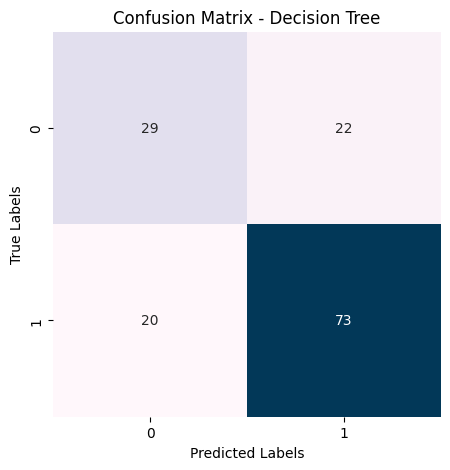


===============================Classification_Report==========================
              precision    recall  f1-score   support

    negative       0.59      0.57      0.58        51
    positive       0.77      0.78      0.78        93

    accuracy                           0.71       144
   macro avg       0.68      0.68      0.68       144
weighted avg       0.71      0.71      0.71       144



In [167]:
cmDT = confusion_matrix(y_test, pred_dt)
labels = ['negative', 'positive']
plot_confusion_matrix(cmDT, "Confusion Matrix - Decision Tree")
print('\n===============================Classification_Report==========================')
print(classification_report(y_test, pred_dt, target_names=labels))

In [168]:
# from sklearn import tree
# fig = plt.figure(figsize = (25,20))
# tree.plot_tree(dt_model, feature_names = x_train.columns, filled = True)
# plt.show()

#Implement Forward Feature Selection

In [169]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [170]:
sfs = SequentialFeatureSelector(dt_model,
                                k_features=5,
                                forward=True,
                                floating=False,
                                verbose=2,
                                scoring='accuracy',
                                cv=5)  # total multiply on cross validation check

In [171]:
sfs = sfs.fit(X_train, y_train)


[2023-10-15 23:03:20] Features: 1/5 -- score: 0.8214661984196663


[2023-10-15 23:03:21] Features: 2/5 -- score: 0.8214661984196663
[2023-10-15 23:03:21] Features: 3/5 -- score: 0.8214661984196663
[2023-10-15 23:03:22] Features: 4/5 -- score: 0.8214661984196663
[2023-10-15 23:03:22] Features: 5/5 -- score: 0.8214661984196663

In [172]:
print(vars(sfs))

{'estimator': DecisionTreeClassifier(random_state=1), 'k_features': (5, 5), 'forward': True, 'floating': False, 'pre_dispatch': '2*n_jobs', 'cv': 5, 'n_jobs': 1, 'verbose': 2, 'clone_estimator': True, 'est_': DecisionTreeClassifier(random_state=1), 'scoring': 'accuracy', 'scorer': make_scorer(accuracy_score), 'fixed_features': None, 'feature_groups': None, 'fitted': True, 'interrupted_': False, '_TESTING_INTERRUPT_MODE': False, 'subsets_': {1: {'feature_idx': (0,), 'cv_scores': array([0.80882353, 0.85074627, 0.8358209 , 0.80597015, 0.80597015]), 'avg_score': 0.8214661984196663, 'feature_names': ('Credit_History',)}, 2: {'feature_idx': (0, 6), 'cv_scores': array([0.80882353, 0.85074627, 0.8358209 , 0.80597015, 0.80597015]), 'avg_score': 0.8214661984196663, 'feature_names': ('Credit_History', 'Gender_Female')}, 3: {'feature_idx': (0, 6, 7), 'cv_scores': array([0.80882353, 0.85074627, 0.8358209 , 0.80597015, 0.80597015]), 'avg_score': 0.8214661984196663, 'feature_names': ('Credit_History'

In [221]:
print('Best features:', sfs.k_feature_names_)

Best features: ('Credit_History', 'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes')


In [174]:
test_predictions = sfs.transform(X_test) #X_test is a test data
dt_model.fit(sfs.transform(X_train), y_train) #X_train is train data and y_train is train target
y_pred = dt_model.predict(test_predictions) #variable y_pred used to save decision tree result with forward selection
#test_accuracy = dt_model.score(test_predictions, y_cv) #y_cv as test target
# Calculate performance evaluate with Forward Selection
accDTfS = accuracy_score(y_test, y_pred)
precisionDTfS = precision_score(y_test, y_pred)
recallDTfS = recall_score(y_test, y_pred)
f1DTfS = f1_score(y_test, y_pred)

# Show performance evaluation results
print(f'Accuracy on test data with selected features: %.2f' %accDTfS)
print(f'Precision on test data with selected features: %.2f' %precisionDTfS)
print(f'Recall on test data with selected features: %.2f' %recallDTfS)
print(f'F1-score on test data with selected features: %.2f' %f1DTfS)

Accuracy on test data with selected features: 0.78
Precision on test data with selected features: 0.75
Recall on test data with selected features: 0.98
F1-score on test data with selected features: 0.85


In [175]:
test_predictions = sfs.transform(X_test)
dt_model.fit(sfs.transform(X_train), y_train)
y_pred = dt_model.predict(test_predictions)

accDTfS = accuracy_score(y_test, y_pred)

# Show performance evaluation results
print(f'Decision Tree Accuracy with Selected Features: %.4f' %accDTfS)

Decision Tree Accuracy with Selected Features: 0.7778


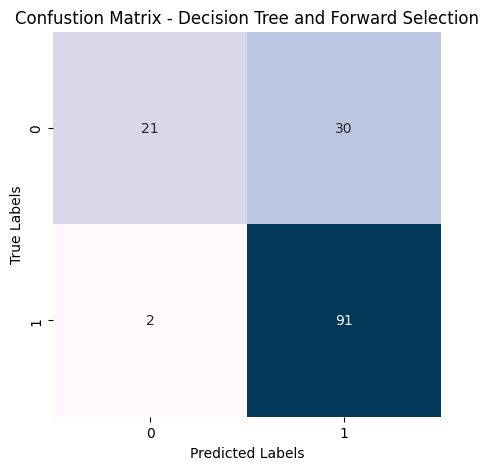


===============================Classification_Report==========================
              precision    recall  f1-score   support

    negative       0.91      0.41      0.57        51
    positive       0.75      0.98      0.85        93

    accuracy                           0.78       144
   macro avg       0.83      0.70      0.71       144
weighted avg       0.81      0.78      0.75       144



In [176]:
cmDT = confusion_matrix(y_test, y_pred)
labels = ['negative', 'positive']
plot_confusion_matrix(cmDT, "Confustion Matrix - Decision Tree and Forward Selection")
print('\n===============================Classification_Report==========================')
print(classification_report(y_test, y_pred, target_names=labels))

In [177]:
# # Plot forward selection performance
# fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
# plt.title('Sequential Forward Selection (w. StdErr)')
# plt.grid()
# plt.show()

# Results

In [178]:
# Create the DataFrame
Results = pd.DataFrame({
    "Accuracy": [accDT, accDTfS],
    "Precision": [precisionDT, precisionDTfS],
    "Recall": [recallDT, recallDTfS],
    "F1": [f1DT, f1DTfS]
}, index=("Decison Tree", "Decison Tree and Forward Selection"))

# Define a formatting function
def format_number(number):
    return '{:.2f}'.format(number)

# Apply the formatting function to the DataFrame
formatted_results = Results.applymap(format_number)

print(formatted_results)


                                   Accuracy Precision Recall    F1
Decison Tree                           0.71      0.77   0.78  0.78
Decison Tree and Forward Selection     0.78      0.75   0.98  0.85


In [179]:
#Final result as a table
from tabulate import tabulate
# Format the DataFrame with two decimal places
formatted_results = Results.applymap(lambda x: '{:.2f}'.format(x))

# Convert the DataFrame to tabular format
table = tabulate(formatted_results, headers='keys', tablefmt='grid')

print(table)

+------------------------------------+------------+-------------+----------+------+
|                                    |   Accuracy |   Precision |   Recall |   F1 |
+====================================+============+=============+==========+======+
| Decison Tree                       |       0.71 |        0.77 |     0.78 | 0.78 |
+------------------------------------+------------+-------------+----------+------+
| Decison Tree and Forward Selection |       0.78 |        0.75 |     0.98 | 0.85 |
+------------------------------------+------------+-------------+----------+------+


<function matplotlib.pyplot.show(close=None, block=None)>

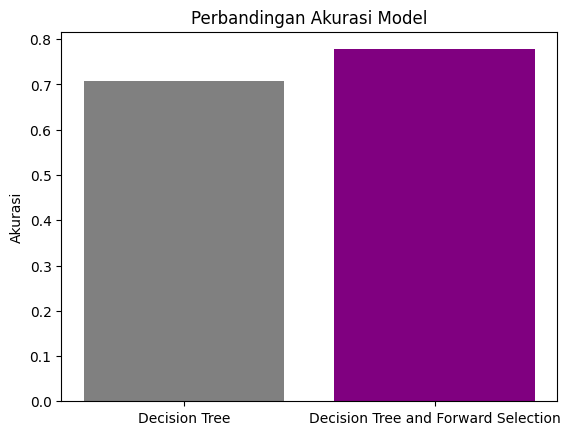

In [180]:
models = ['Decision Tree', 'Decision Tree and Forward Selection']
accuracies = [accDT, accDTfS]
best_accuracy = max(accuracies)

colors = ['purple' if acc == best_accuracy else 'grey' for acc in accuracies]

plt.bar(models, accuracies, color=colors)
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Model')
plt.show

#Deployment Part

In [216]:
import pickle

# Misalkan Anda telah melatih dt_model dengan fitur-fitur yang dipilih oleh SFS
# Anda memiliki dt_model dan sfs sebagai objek yang telah dimodifikasi

# Buat sebuah objek yang berisi model dan objek SFS
dtfs = {
    'model': dt_model,  # model Decision Tree yang dimodifikasi
    'sfs': sfs,  # objek Sequential Feature Selector
}

# Simpan objek ini dalam satu file pickle
with open('dtfs.pkl', 'wb') as file:
    pickle.dump(dtfs, file)